## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 9.3 MB/s eta 0:00:00


1.2 라이브러리 설정

In [22]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [23]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [24]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [25]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [26]:
posts = []
for post in top_posts:
    posts.append({
        'Title': post.title,
        'Content': post.selftext
    })

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [27]:
df = pd.DataFrame(posts)

In [28]:
df.head(100)

,Title,Content
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
95,Nvidia says it didn’t receive antitrust subpoe...,\n\nNvidia on Wednesday denied reports it rece...
96,Nvdia to stop all product sales to Russia,Nvidia on Friday said it’s halting all product...
97,Potential big tech stocks shopping list today,The nasdaq is dropping about 2.5% as of right ...
98,WSJ - S&P 500 ends longest bear market since t...,"U.S. stocks rose Thursday, ending the S&P 500’..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [29]:
import string
import re
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation + "'")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# 전처리 함수 정의
def preprocess_text(text):
    text = text.lower() # 소문자 변환

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # 주소 제거

    text = re.sub(r'\d+', '', text) # 숫자 제거

    text = re.sub(r'[^\w\s]', '', text)  # 기호제거
    text = re.sub(r'[_\W]+', ' ', text)  # 연속기호 제거

    tokens = word_tokenize(text) # 토큰화

    tokens = [word for word in tokens if word not in stop_words] # 불용어 제거
    return tokens

df_raw = df.copy()
df['Title'] = df['Title'].apply(preprocess_text)
df['Content'] = df['Content'].apply(preprocess_text)

In [11]:
df.head(100)

,Title,Content
0,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year, sp]","[lately, keep, hearing, old, narrative, beatdo..."
2,"[pelosis, husband, buying, million, computer, ...","[full, article, paul, pelosi, house, speaker, ..."
3,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, a..."
4,"[blackberry, dormant, giant]","[abbreviation, index, bb, blackberry, aws, ama..."
...,...,...
95,"[nvidia, says, didnt, receive, antitrust, subp...","[nvidia, wednesday, denied, reports, received,..."
96,"[nvdia, stop, product, sales, russia]","[nvidia, friday, said, halting, product, sales..."
97,"[potential, big, tech, stocks, shopping, list,...","[nasdaq, dropping, right, many, good, quality,..."
98,"[wsj, sp, ends, longest, bear, market, since, ...","[us, stocks, rose, thursday, ending, sp, longe..."


2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [12]:
titles = ' '.join([' '.join(title) for title in df['Title']])
contents = ' '.join([' '.join(content) for content in df['Content']])
combined_text = titles + ' ' + contents


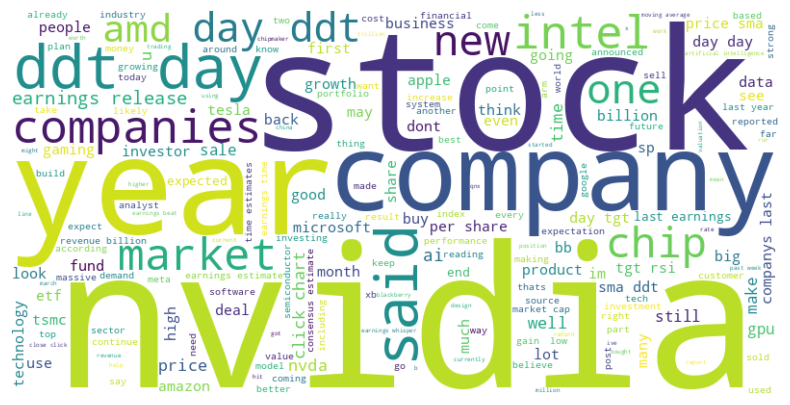

In [13]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

In [14]:
from collections import Counter
word_counts = Counter(combined_text.split())

most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

<ipython-input-15-a08232237864>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=data, palette='viridis')


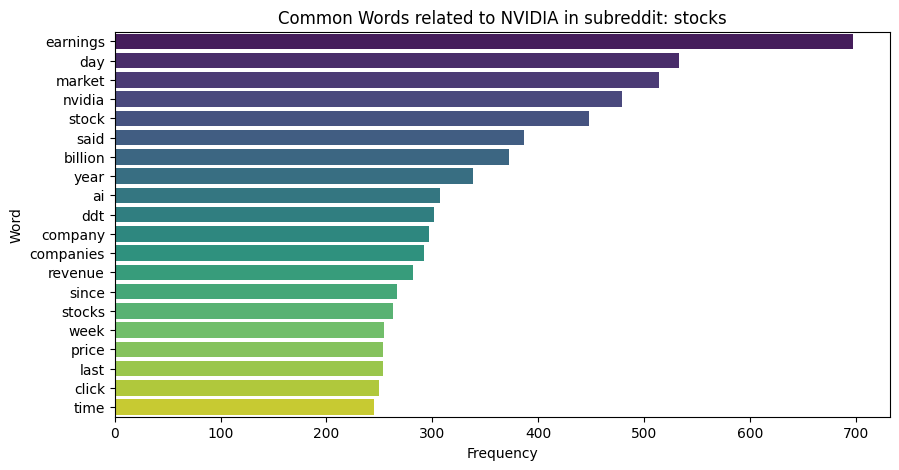

In [15]:
data = pd.DataFrame({'Word': words, 'Frequency': counts})

plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=data, palette='viridis')
plt.title('Common Words related to NVIDIA in subreddit: stocks')
plt.show()

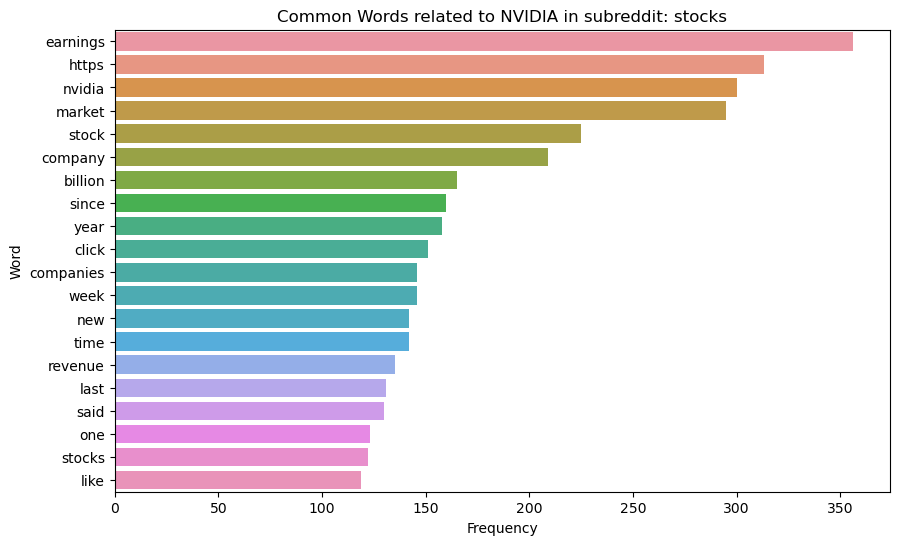

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [31]:
from textblob import TextBlob

# 감성 분석 함수
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [32]:
df_raw['Title Sentiment'] = df_raw['Title'].apply(lambda x: ' '.join(x)).apply(get_sentiment)
df_raw['Content Sentiment'] = df_raw['Content'].apply(lambda x: ' '.join(x)).apply(get_sentiment)

In [33]:
df_raw['Sentiment Category'] = df_raw['Content Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [37]:
sentiment_counts = df_raw['Sentiment Category'].value_counts()

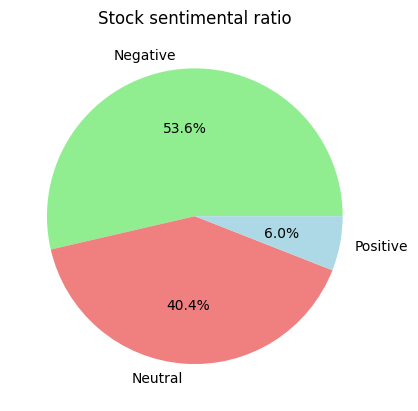

In [39]:
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Stock sentimental ratio')
plt.show()